In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

Let's generate some fake data for linear regression:

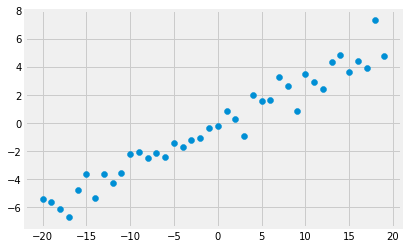

In [2]:
x = np.arange(-20,20)
y = 0.3 * x + np.random.randn(40)
plt.scatter(x,y);

For simplicity, let's assume we know the intercept (zero) and noise distribution (standard normal). Our goal is just to find the slope. So for the $n$th point, we have

$$
y_n \sim \mathcal{N}(\beta x_n, 1)
$$,

which visually looks like the below (with 3 points / conditional distributions highlighted):

![linear_conditionals](linear_conditionals.png)

Let's assume the $y$ values are independent. By the MLE framework's approach, the parameter $\beta$ is assumed to be unknown, but fixed. So the probability of the observation is just

$$
P\left(y\ |\ \beta\right)	
= \prod_{N\text{ points}} P(y_n\ |\ \beta)
=\prod_{N\text{ points}}\mathcal{N}\left(y_{n}\ |\ \beta x_{n},1\right)
	=\prod_{N\text{ points}}\left(\frac{1}{\sqrt{2\pi}}\exp\left\{ \frac{-\left(y_{n}-\beta x_{n}\right)^2}{2}\right\} \right)
    $$

We've been considering this as a function of $y$, but since we've observed data, we're really more interested in it as a function of $\beta$. This is the *likelihood*, 

$$
\mathcal{L}(\beta|y) = P(y|\beta)
$$

We're interesting in the *maximum likelihood estimate*, which estimates the parameter by maximizing the likelihood function. In other words, **finding the value of the parameter with the highest probability of generating the data we did, in fact, observe**.

So combining what we have to this point, we'd like to estimate $\beta$ by finding the value that maximizes the likelihood,

$$
\mathcal{L}(\beta|y) = \prod_{N\text{ points}}\left(\frac{1}{\sqrt{2\pi}}\exp\left\{ \frac{-\left(y_{n}-\beta x_{n}\right)^2}{2}\right\} \right)
$$

So far, so good. What's a good way to maximize things? There are lots, but here it will probably be quickest to work in terms of derivatives. But differentiating a product is a mess. Do we really have to do it this way? Spoiler: no.

It would be so much easier to work in terms of a sum, instead of a product. Then the derivative would be easy - we could just calculate term by term.

But we *can* work in terms of a sum! We can simply exploit the fact that **maximizing a value is equivalent to maximizing the log of that value**. Let's just take the log of both sides:


\begin{align*}
\log \mathcal{L}(\beta|y) 
&= \log \prod_{N\text{ points}}\left(\frac{1}{\sqrt{2\pi}}\exp\left\{ \frac{-\left(y_{n}-\beta x_{n}\right)^2}{2}\right\} \right) 
\\ &= \sum_{N\text{ points}} \log \left(\frac{1}{\sqrt{2\pi}}\exp\left\{ \frac{-\left(y_{n}-\beta x_{n}\right)^2}{2}\right\} \right) 
\\ &= \sum_{N\text{ points}} \left[ \log \frac{1}{\sqrt{2\pi}} - \frac{\left(y_{n}-\beta x_{n}\right)^2}{2} \right]
\\ &= C - \frac{1}{2}\sum_{N\text{ points}} \left(y_{n}-\beta x_{n}\right)^2
\end{align*}


Ok, time for the big reveal. Look at that line. To maximize that, we want to **minimize the negative quantity**. 

**I.e. for a normal linear regression model, maximizing likelihood is the same as minimizing $\sum_{N\text{ points}} \left(y_{n}-\beta x_{n}\right)^2$**, the SSE loss that we know and love.